In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('Dhaka Rent.csv', sep=';')
df.head(3)

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050


In [5]:
x = df['area']
y = df['rent']

In [6]:
mean_x = np.mean(x)
mean_y = np.mean(y)


In [7]:
dev_x = x - mean_x
dev_y = y - mean_y

In [8]:
m = np.sum(dev_x*dev_y) / np.sum(dev_x**2)
print(m)

21.292661473611954


In [9]:
# y = mx + c
c = mean_y - (m*mean_x)
print(c)

-11469.7354464311


In [10]:
pred_2000 = m*2000 + c
print(pred_2000)

31115.58750079281


Sklearn

Text(0.5, 1.0, 'House Rent in Dhaka')

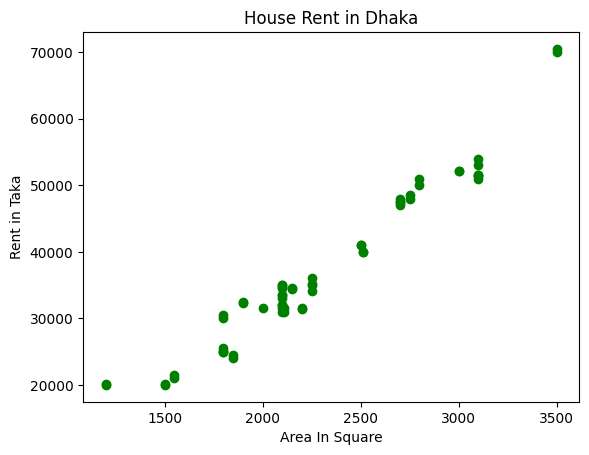

In [11]:
plt.scatter(x,y, color ='green')
plt.xlabel("Area In Square")
plt.ylabel("Rent in Taka")
plt.title('House Rent in Dhaka')

In [12]:
df.corr() # correlation between two variables

,area,rent
area,1.000000,0.974807
rent,0.974807,1.000000


In [13]:
df.describe()

,area,rent
count,60.000000,60.000000
mean,2289.000000,37269.166667
std,538.880509,11770.736234
min,1200.000000,20000.000000
25%,1900.000000,31000.000000
50%,2130.000000,34450.000000
75%,2700.000000,47625.000000
max,3500.000000,70500.000000


In [14]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(df[['area']], df['rent'])



In [15]:
reg.coef_

array([21.29266147])

In [16]:
reg.intercept_

np.float64(-11469.735446431114)

In [17]:
reg.predict([[2000]])

array([31115.58750079])

In [18]:
df.head(5)

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [19]:
df['predicted'] = reg.predict(df[['area']])
df.head(5)

,area,rent,predicted
0,2000,31500,31115.587501
1,2100,35000,33244.853648
2,2500,41050,41761.918238
3,2250,36100,36438.752869
4,3000,52100,52408.248974


In [20]:
df['residuals'] = df['rent'] - df['predicted']
df.head(10)

,area,rent,predicted,residuals
0,2000,31500,31115.587501,384.412499
1,2100,35000,33244.853648,1755.146352
2,2500,41050,41761.918238,-711.918238
3,2250,36100,36438.752869,-338.752869
4,3000,52100,52408.248974,-308.248974
5,1900,32500,28986.321353,3513.678647
6,1500,20000,20469.256764,-469.256764
7,1850,24500,27921.688280,-3421.688280
8,2700,48000,46020.450532,1979.549468
9,2100,31000,33244.853648,-2244.853648


MSE, MAE, RMSE 

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [24]:
mse = mean_squared_error(df[['predicted']], df[['rent']])
mse

6778077.204095561

In [26]:
mae = mean_absolute_error(df.predicted, df.rent)
mae

2009.8695093576282

Best Fit Line

Text(0.5, 1.0, 'House Rent in Dhaka')

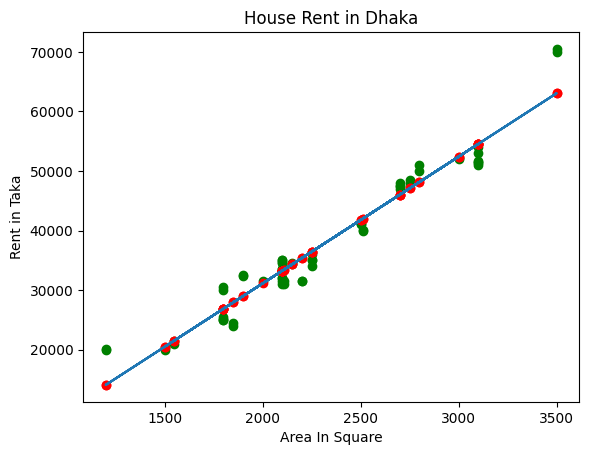

In [28]:
plt.scatter(x,y, color ='green')
plt.plot(x, df.predicted)
plt.scatter(x, df.predicted, color='red')
plt.xlabel("Area In Square")
plt.ylabel("Rent in Taka")
plt.title('House Rent in Dhaka')